In [147]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

df = pd.read_csv('C:/Users/Lenovo/Desktop/train.csv')

In [148]:
df.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [149]:
df = df.loc[:,~df.columns.str.contains('Unnamed')]
df.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [150]:
#观看标签分类大小
df['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [151]:
df['Attrition']=df['Attrition'].apply(lambda x:0 if x=='No' else 1)

In [152]:
df.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)

In [153]:
#根据可视化图重设年龄分组便于后续分类
def resetAge(input):
    if ((input < 24) & (input > 18)) | (input == 58):
        return 1
    elif (input == 18) | (input == 48) |(input == 54) | (input == 57) | (input > 58) :
        return 0
    else:
        return 2
#根据可视化图重设薪酬分组便于后续分类
def resetSalary(input):
    if (input>0) & (input<3725):
        return 0
    elif (input>=3725) & (input<111250):
        return 1
    else:
        return 2
#根据可视化图重设工资提高百分比分组便于后续分类
def resetPerHike(input):
    if (input>=22) & (input<25):
        return 0
    elif ((input>=11) & (input<14)) |((input>14) & (input <22)):
        return 1
    else:
        return 2
#根据可视化图重设开始工作年龄分组
def resetStart(input):
    if (input==49)|(input==51):
        return 3
    elif (input==22)|(input==27)|(input==31)|(input==40):
        return 2
    elif (input==42)|((input>43)&(input<49))|(input==50)|(input>=52):
        return 0
    else:
        return 1

df['Age']=df['Age'].apply(resetAge)
df['MonthlyIncome']=df['MonthlyIncome'].apply(resetSalary)
df['PercentSalaryHike']=df['PercentSalaryHike'].apply(resetPerHike)
# df['StartWorking']=df['StartWorking'].apply(resetStart)

In [154]:
#独热编码
cata_result = pd.DataFrame()
for i in df.columns:
    if df[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(df[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

#删除点object变量
for i in df.columns:
    if df[i].dtype == 'O':
        df = df.drop(i,axis=1)

df = pd.concat([df,cata_result],axis=1)
df.head()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1374,1,0,605,21,3,1,4,72,3,...,0,0,0,0,0,0,1,0,0,1
1,1092,2,0,950,28,3,1,4,97,3,...,0,0,1,0,0,0,1,0,1,0
2,768,2,0,300,26,3,1,3,74,3,...,0,0,0,1,0,0,1,0,1,0
3,569,2,0,1434,8,4,1,1,76,2,...,0,0,0,1,0,0,0,1,1,0
4,911,2,1,599,24,1,1,3,73,1,...,0,0,0,0,1,0,0,1,0,1


In [155]:
df.drop(columns=['user_id'],inplace=True)

In [171]:
columns = list(df)
columns.insert(0, columns.pop(columns.index('Attrition')))
df = df.loc[:, columns]
df.head()
df.to_csv('C:/Users/lenovo/Desktop/train.csv')

In [157]:
y= df.iloc[:,0]
X= df.iloc[:,1:]

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [172]:
# dataMat - 特征列表
# labelMat - 标签列表

# 函数说明:加载数据
def loadDataSet(x,y):
    dataMat = x.values.tolist()
    labelMat = y.values.tolist()
    return dataMat, labelMat  

# 函数说明:sigmoid函数
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def plotBestFit(dataArr,labelMat,weights):
#     dataMat, labelMat = loadDataSet(X,y)                                 
#     dataArr = np.array(dataMat)                                        
    n = np.shape(dataArr)[0]                                           
    xcord1 = []; ycord1 = []                                            
    xcord2 = []; ycord2 = []                                            
    for i in range(n):                                                  
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])   
    fig = plt.figure()
    ax = fig.add_subplot(111)                                           
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's',alpha=.5)
    ax.scatter(xcord2, ycord2, s = 30, c = 'green',alpha=.5)            
    # x = np.arange(-3.0, 3.0, 0.1)
    # y = (-weights[0] - weights[1] * x) / weights[2]
    # ax.plot(x, y)
    # dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    # w0*x0+w1*x1+w2*x2=f(x)
    plt.title('BestFit')                                               
    plt.xlabel('X'); plt.ylabel('Y')                                 
    plt.show()


# dataMatrix -  特征数组
# classLabels - 数据标签
# weights - 回归系数数组
# 函数说明:改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)                                       
    weights = np.ones(n)                                             
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):                                            
            alpha = 4/(1.0+j+i)+0.01                                  
            randIndex = int(random.uniform(0,len(dataIndex)))         
            h = sigmoid(sum(dataMatrix[randIndex]*weights))                                                                                 
            error = classLabels[randIndex] - h                        
            weights = weights + alpha * error * dataMatrix[randIndex] 
            del(dataIndex[randIndex])                                 
    return weights                                                    

In [161]:
def colicTest():
    trainingSet,trainingLabels =loadDataSet(X_train,y_train)
    testSet,testLabels =loadDataSet(X_test,y_test)    
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)       
  
    y_predit = []
    y_pro = []
    for i in range(len(testSet)):
        y_predit.append(int(classifyVector(np.array(testSet[i]), trainWeights)))
        y_pro.append( sigmoid(sum(np.array(testSet[i])*trainWeights)))
    return y_predit,testLabels,y_pro

# 函数说明:分类函数
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [162]:
y_predit,testLabels,y_pro =colicTest()

F:\temp/ipykernel_19660/2487621078.py:41: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-inX))


              precision    recall  f1-score   support

           0       0.83      0.69      0.75       189
           1       0.26      0.45      0.33        47

    accuracy                           0.64       236
   macro avg       0.55      0.57      0.54       236
weighted avg       0.72      0.64      0.67       236



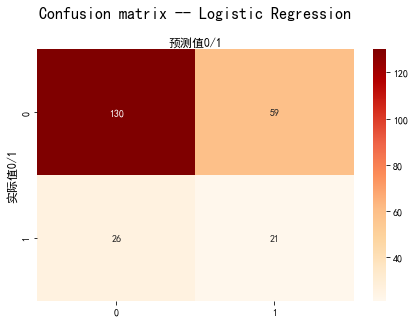

In [163]:
#混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
from sklearn.metrics import classification_report
print(classification_report(testLabels,y_predit))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testLabels,y_predit)


def plot_cnf_matirx(cnf_matrix, description):
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='OrRd',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y=1.1, fontsize=16)
    plt.ylabel('实际值0/1', fontsize=12)
    plt.xlabel('预测值0/1', fontsize=12)
    plt.show()


plot_cnf_matirx(cnf_matrix, 'Confusion matrix -- Logistic Regression')

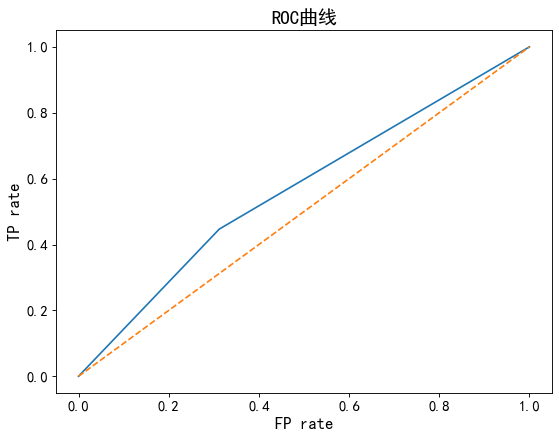

In [166]:
from sklearn.metrics import roc_curve
fprs3,tprs3,thresholds3 = roc_curve(testLabels,y_pro)
# 此处调用前面的绘制函数

def plot_roc_curve(fprs, tprs):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(fprs, tprs)
    plt.plot([0, 1], linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate', fontsize=15)
    plt.xlabel('FP rate', fontsize=15)
    plt.title('ROC曲线', fontsize=17)
    plt.show()

plot_roc_curve(fprs3,tprs3)

In [167]:
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(testLabels,y_pro)
# metrics.auc(fpr, tpr)
from sklearn.metrics import accuracy_score
print(accuracy_score(testLabels,y_predit)) 

0.6398305084745762


In [170]:
y_test.value_counts()

0    189
1     47
Name: Attrition, dtype: int64